<a href="https://colab.research.google.com/github/Gunugurr/DeepLearningBootcamp/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.8.2'

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa
import os

from tqdm import tqdm

In [6]:
from sklearn.model_selection     import train_test_split
from sklearn.preprocessing       import LabelEncoder
from tensorflow.keras.utils      import to_categorical
from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam

In [7]:
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint

In [18]:
import librosa
audio_file_path = "drive/MyDrive/UrbanSound8K/UrbanSound8K/audio/fold1/7061-6-0-0.wav"
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

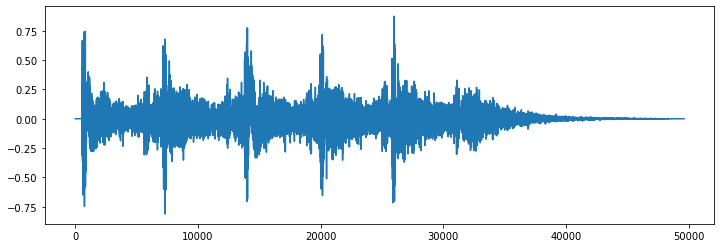

In [19]:
plt.figure(figsize = (12, 4))
plt.plot(librosa_audio_data)
plt.show()

In [23]:
from IPython.display import Audio
Audio('7061-6-0-0.wav')

In [24]:
mfccs = librosa.feature.mfcc(y = librosa_audio_data, sr = librosa_sample_rate, n_mfcc = 40)

In [25]:
mfccs.shape

(40, 97)

In [26]:
mfccs

array([[-9.7246902e+01,  4.0316453e+00,  1.1968136e+01, ...,
        -5.6935333e+02, -5.9172742e+02, -6.1055634e+02],
       [ 3.5644501e+01,  2.8615967e+01,  1.6373653e+01, ...,
         4.3051193e+01,  2.5888168e+01,  1.2927584e+01],
       [-8.1454201e+00, -1.6915291e+01, -1.9951187e+01, ...,
        -1.1103719e+01, -7.5504932e+00,  2.2211954e-01],
       ...,
       [ 2.2777529e+00, -1.5067056e+00, -2.9042490e+00, ...,
         2.4095769e+00,  3.1699095e+00, -1.5433383e-01],
       [-1.1546648e+01, -1.1023926e+01, -8.2097263e+00, ...,
        -5.0198495e-02,  7.2893953e-01, -8.3967167e-01],
       [ 3.4006422e+00,  3.6515732e+00,  4.7461324e+00, ...,
        -2.0609200e+00, -2.2312026e+00, -1.7239635e+00]], dtype=float32)

In [27]:
audio_dataset_path = "drive/MyDrive/UrbanSound8K/UrbanSound8K/audio/"
metadata = pd.read_csv("drive/MyDrive/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [28]:
def feature_extractor(file):
  audio, sample_rate = librosa.load(file_name, res_type = "kaiser_fast")
  # Öz nitelik
  mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
  mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)

  return mfccs_scaled_features

In [29]:
extracted_features = []

for index_num,row in tqdm(metadata.iterrows()):
  file_name = os.path.join(os.path.abspath(audio_dataset_path),"fold" + str(row["fold"]) + "/", str(row["slice_file_name"]))
  final_class_labels = row["class"]
  data = feature_extractor(file_name)
  extracted_features.append([data, final_class_labels])

3555it [37:15,  1.32it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8325it [1:26:51,  1.91it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [1:31:07,  1.60it/s]


In [30]:
extracted_features_df = pd.DataFrame(extracted_features, columns = ["features", "class"])
extracted_features_df.head()

,features,class
0,"[-214.95764, 70.502464, -130.70279, -53.116936...",dog_bark
1,"[-423.7311, 109.2299, -52.872597, 60.827538, 0...",children_playing
2,"[-458.52844, 121.35432, -46.53568, 51.969467, ...",children_playing
3,"[-413.6325, 101.61351, -35.43868, 53.047146, 1...",children_playing
4,"[-446.38693, 113.68634, -52.4572, 60.349728, 2...",children_playing


In [31]:
extracted_features_df.tail()

,features,class
8727,"[-398.28668, 135.51045, -50.712845, 35.86571, ...",car_horn
8728,"[-345.8734, 86.30015, -45.13337, 51.709526, -3...",car_horn
8729,"[-303.65482, 111.28415, -45.883854, 35.81933, ...",car_horn
8730,"[-343.75665, 125.42341, -54.89965, 34.886555, ...",car_horn
8731,"[-315.2037, 94.662476, -37.090714, 46.635475, ...",car_horn


In [32]:
x = np.array(extracted_features_df["features"].tolist())
y = np.array(extracted_features_df["class"].tolist())

In [33]:
x.shape

(8732, 40)

In [34]:
y.shape

(8732,)

In [35]:
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [37]:
x_train

array([[-1.3082390e+02,  1.1256226e+02, -2.2600880e+01, ...,
         3.2528090e+00, -1.3692100e+00,  2.7386467e+00],
       [-1.3446434e+01,  9.1048195e+01, -7.8661480e+00, ...,
        -3.2665925e+00, -5.2884049e+00, -1.5532948e+00],
       [-4.9575279e+01,  2.3543632e-01, -2.0504959e+01, ...,
         2.8775632e+00, -1.5828820e+00,  3.5109406e+00],
       ...,
       [-4.2677444e+02,  9.2583252e+01,  3.3174915e+00, ...,
         7.9330570e-01,  7.1890563e-01,  7.1397936e-01],
       [-1.4541724e+02,  1.3619023e+02, -3.3450352e+01, ...,
         1.4591717e+00, -1.9928970e+00, -8.9318514e-01],
       [-4.2099823e+02,  2.1074756e+02,  3.5814042e+00, ...,
        -5.4054904e+00, -3.3959770e+00, -1.5590971e+00]], dtype=float32)

In [15]:
num_labels = 10

In [16]:
# Hidden Layers
model = Sequential()
model.add(Dense(125, input_shape = (40,)))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(250))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(250))
model.add(Activation("relu"))
model.add(Dropout(0.5))

#output
model.add(Dense(num_labels))
model.add(Activation("softmax"))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 125)               5125      
                                                                 
 activation (Activation)     (None, 125)               0         
                                                                 
 dropout (Dropout)           (None, 125)               0         
                                                                 
 dense_1 (Dense)             (None, 250)               31500     
                                                                 
 activation_1 (Activation)   (None, 250)               0         
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 250)               6

In [39]:
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")

In [40]:
epochscount = 300
num_batch_size = 32

In [41]:
model.fit(x_train, y_train, epochs = epochscount, batch_size = num_batch_size, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/300
219/219 [==============================] - 5s 4ms/step - loss: 10.1143 - accuracy: 0.1522 - val_loss: 2.0983 - val_accuracy: 0.2833
Epoch 2/300
219/219 [==============================] - 1s 3ms/step - loss: 2.6450 - accuracy: 0.1908 - val_loss: 2.0728 - val_accuracy: 0.2862
Epoch 3/300
219/219 [==============================] - 1s 3ms/step - loss: 2.1774 - accuracy: 0.2445 - val_loss: 1.9881 - val_accuracy: 0.3560
Epoch 4/300
219/219 [==============================] - 1s 4ms/step - loss: 2.0287 - accuracy: 0.2709 - val_loss: 1.8901 - val_accuracy: 0.4076
Epoch 5/300
219/219 [==============================] - 1s 4ms/step - loss: 1.9428 - accuracy: 0.3061 - val_loss: 1.7728 - val_accuracy: 0.4339
Epoch 6/300
219/219 [==============================] - 1s 4ms/step - loss: 1.8262 - accuracy: 0.3518 - val_loss: 1.6458 - val_accuracy: 0.5026
Epoch 7/300
219/219 [==============================] - 1s 3ms/step - loss: 1.7383 - accuracy: 0.3847 - val_loss: 1.5389 - val_accuracy: 0.521

In [42]:
validation_test_set_accuracy = model.evaluate(x_test, y_test, verbose = 0)
print(validation_test_set_accuracy[1])

0.8202633261680603


In [44]:
filename = "50668-5-3-0.wav"
sound_signal, sample_rate = librosa.load(filename, res_type = "kaiser_fast")
mfcc_features = librosa.feature.mfcc(y = sound_signal, sr = sample_rate, n_mfcc = 40)
mfccs_scaled_features = np.mean(mfcc_features.T, axis = 0)

In [51]:
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
result_array = model.predict(mfccs_scaled_features)
result_array #En büyük eleman 6. eleman olduğu görülmektedir. (8. elemanla çok yakın)
# Veri setindeki 6. eleman "motor" sesidir ve ses de bununla eşleşmektedir. (hilti sesi ile çok yakın)

array([[0.08126113, 0.01395072, 0.14390062, 0.02973112, 0.12016007,
        0.26729608, 0.0149428 , 0.23912396, 0.01893581, 0.07069775]],
      dtype=float32)

In [46]:
resultclass = ["air_condition", "car_horn", "children_playing", "dog_bark", "drilling", "engine_idling", "gun_shot", "jackhammer", "siren", "street_music" ]

In [47]:
result = np.argmax(result_array[0]) # En büyük değeri bulur
resultclass[result]

'engine_idling'

In [48]:
if resultclass[result] == "air_condition":
  print("Bu ses klimaya ait.")
if resultclass[result] == "car_horn":
  print("Bu ses araba kornasına ait.")
if resultclass[result] == "children_playing":
  print("Bu ses oyun oynayan çocuklara ait.")
if resultclass[result] == "dog_bark":
  print("Bu ses köpek havlamasına ait.")
if resultclass[result] == "drilling":
  print("Bu ses matkap sesine ait.")
if resultclass[result] == "gun_shot":
  print("Bu ses silah sesine ait.")
if resultclass[result] == "engine_idling":
  print("Bu ses motora ait.")
if resultclass[result] == "jackhammer":
  print("Bu ses hiltiye ait.")
if resultclass[result] == "siren":
  print("Bu ses sirene ait.")
if resultclass[result] == "street_music":
  print("Bu ses sokak müziğine ait.") 

Bu ses motora ait.


In [50]:
from IPython.display import Audio
Audio("50668-5-3-0.wav")